In [190]:
%pylab inline
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
trade = pd.read_csv('CU Test trade.csv',index_col='datetime',parse_dates=True)

In [20]:
trade.columns = [x.strip() for x in trade.columns]

In [22]:
trade = trade[['symbol','side','position_effect','last_quantity','last_price']]

In [24]:
log = pd.read_table('CU Test log',sep='\s\s',encoding='utf8',names=['datetime','level','log'],index_col=0,parse_dates=True)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [25]:
def get_price(log):
    idx = log.find('止盈价格')
    if idx < 0:
        return np.nan
    num = log[idx+4:]
    try:
        return float(num)
    except:
        return np.nan
log['stop_price'] = log['log'].apply(get_price)

In [26]:
log = log[['log','level','stop_price']]

In [27]:
log[:5]

,log,level,stop_price
datetime,,,
2016-01-04 09:31:00,总计盈利次数0,INFO,NaN
2016-01-04 09:31:00,总计亏损次数0,INFO,NaN
2016-01-05 00:16:00,CU1603 下单量 111 超过当前 Bar 成交量的 25.0%，实际成交 84.0。,WARN,NaN
2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0
2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN


In [30]:
trade_hist = pd.merge(log,trade,how='inner',left_index=True,right_index=True)
trade_hist

,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price
datetime,,,,,,,,
2016-01-05 00:16:00,CU1603 下单量 111 超过当前 Bar 成交量的 25.0%，实际成交 84.0。,WARN,NaN,CU1603,SELL,OPEN,84,35910.0
2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.0
2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.0
2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.0
2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.0
2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.0
2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.0
2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.0
2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.0


In [40]:
filter_trade_hist = trade_hist[trade_hist.stop_price.notnull() | (trade_hist.position_effect != 'OPEN')]

In [41]:
filter_trade_hist

,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price
datetime,,,,,,,,
2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.0
2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.0
2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.0
2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.0
2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.0
2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.0
2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.0
2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.0
2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.0


In [42]:
filter_trade_hist['expect_profit'] = (filter_trade_hist.last_price - filter_trade_hist.stop_price).apply(np.abs)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
filter_trade_hist

,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,real
datetime,,,,,,,,,,
2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.0,120.0,NaN
2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.0,NaN,-500.0
2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.0,90.0,NaN
2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.0,NaN,180.0
2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.0,90.0,NaN
2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.0,NaN,-210.0
2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.0,10.0,NaN
2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.0,NaN,320.0
2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.0,330.0,NaN


In [51]:
filter_trade_hist = filter_trade_hist[filter_trade_hist.level == 'INFO']

In [56]:
open_op = filter_trade_hist[filter_trade_hist.position_effect=='OPEN']
close_op = filter_trade_hist[filter_trade_hist.position_effect=='CLOSE']

In [76]:
filter_trade_hist['real'] = filter_trade_hist.last_price - filter_trade_hist.shift(1).last_price

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
filter_trade_hist.real[(filter_trade_hist.side=='BUY') & (filter_trade_hist.position_effect=='CLOSE')]=filter_trade_hist.real * -1

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [146]:
final_data = filter_trade_hist.reset_index()

In [147]:
final_data = final_data[['datetime','log','level','stop_price','symbol','side','position_effect','last_quantity','last_price','expect_profit']]

In [148]:
final_data['drop'] = False

In [149]:
final_data

,datetime,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,drop
0,2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.0,120.0,False
1,2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.0,NaN,False
2,2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.0,90.0,False
3,2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.0,NaN,False
4,2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.0,90.0,False
5,2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.0,NaN,False
6,2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.0,10.0,False
7,2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.0,NaN,False
8,2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.0,330.0,False
9,2016-01-11 10:31:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,101,35230.0,NaN,False


In [164]:
i = 1
while i < 375:
    row1 = final_data.loc[i-1]
    row2 = final_data.loc[i]
    if row1.position_effect == 'CLOSE' and row2.position_effect == 'CLOSE':
        final_data.loc[i-1,'drop'] = True
        final_data.loc[i,'last_price'] = (row1.last_quantity * row1.last_price + row2.last_quantity * row2.last_price)/(row1.last_quantity+row2.last_quantity)
    i += 1

In [165]:
final_data

,datetime,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,drop
0,2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.000000,120.0,False
1,2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.000000,NaN,False
2,2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.000000,90.0,False
3,2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.000000,NaN,False
4,2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.000000,90.0,False
5,2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.000000,NaN,False
6,2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.000000,10.0,False
7,2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.000000,NaN,False
8,2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.000000,330.0,False
9,2016-01-11 10:31:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,101,35230.000000,NaN,False


In [179]:
final_data['real_profit'] = final_data.last_price - final_data.shift(1).last_price

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
final_data = final_data[['datetime','log','level','stop_price','symbol','side','position_effect','last_quantity','last_price','expect_profit','real_profit']]

In [183]:
final_data.real_profit[final_data.position_effect=='OPEN']=np.nan

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [186]:
final_data.real_profit[(final_data.side=='BUY') & (final_data.position_effect=='CLOSE')]=final_data.real_profit * -1

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [213]:
final_data

,datetime,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,real_profit
0,2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.000000,120.0,NaN
1,2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.000000,NaN,-500.000000
2,2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.000000,90.0,NaN
3,2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.000000,NaN,180.000000
4,2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.000000,90.0,NaN
5,2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.000000,NaN,-210.000000
6,2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.000000,10.0,NaN
7,2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.000000,NaN,320.000000
8,2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.000000,330.0,NaN
9,2016-01-11 10:31:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,101,35230.000000,NaN,360.000000


In [224]:
expect = final_data[final_data.expect_profit.notnull()]
real = final_data[final_data.real_profit.notnull()]
# expect = real.reset_index(drop=True)
# real = expect.reset_index(drop=True)

In [233]:
expect[:5]

,datetime,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,real_profit
0,2016-01-05 00:16:00,"卖出开仓111.0手,止盈价格35790.0",INFO,35790.0,CU1603,SELL,OPEN,84,35910.0,120.0,NaN
1,2016-01-06 14:46:00,"买入开仓87.0手,止盈价格36350.0",INFO,36350.0,CU1603,BUY,OPEN,87,36260.0,90.0,NaN
2,2016-01-06 23:46:00,"买入开仓95.0手,止盈价格36510.0",INFO,36510.0,CU1603,BUY,OPEN,95,36420.0,90.0,NaN
3,2016-01-07 21:01:00,"卖出开仓85.0手,止盈价格35900.0",INFO,35900.0,CU1603,SELL,OPEN,85,35910.0,10.0,NaN
4,2016-01-08 11:16:00,"卖出开仓101.0手,止盈价格35260.0",INFO,35260.0,CU1603,SELL,OPEN,101,35590.0,330.0,NaN


In [244]:
real = real.reset_index(drop=True)

In [245]:
real[:5]

,datetime,log,level,stop_price,symbol,side,position_effect,last_quantity,last_price,expect_profit,real_profit
0,2016-01-05 21:31:00,价格高于21日均线，平空仓,INFO,NaN,CU1603,BUY,CLOSE,84,36410.0,NaN,-500.0
1,2016-01-06 22:46:00,价格达到止盈价格，平多仓,INFO,NaN,CU1603,SELL,CLOSE,87,36440.0,NaN,180.0
2,2016-01-07 11:01:00,价格低于21日均线，平多仓,INFO,NaN,CU1603,SELL,CLOSE,95,36210.0,NaN,-210.0
3,2016-01-07 22:01:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,85,35590.0,NaN,320.0
4,2016-01-11 10:31:00,价格低于止盈价格，平空仓,INFO,NaN,CU1603,BUY,CLOSE,101,35230.0,NaN,360.0


In [246]:
fig_date = expect[['side','expect_profit']]

In [247]:
fig_date['real_profit'] = real.real_profit

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
fig_date

,side,expect_profit,real_profit
0,SELL,120.0,-500.000000
1,BUY,90.0,180.000000
2,BUY,90.0,-210.000000
3,SELL,10.0,320.000000
4,SELL,330.0,360.000000
5,SELL,50.0,139.512195
6,SELL,240.0,110.000000
7,SELL,180.0,-90.000000
8,SELL,310.0,-300.000000
9,SELL,210.0,-450.000000


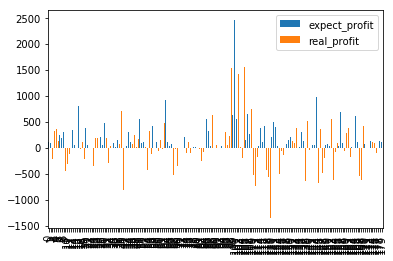

In [249]:
fig_date.plot(kind='bar')

In [250]:
fig_date.to_csv('profit.csv')